<a href="https://colab.research.google.com/github/Yishun-Wang/Coursera_Capstone/blob/main/IBM_Applied_Data_Science_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expore the city of Toronto ! 
## Neighbourhoods analysis and Where to open an East Asian Resturant in Toronto ?

### Objectvie: To find the ideal neighbourhood in Torontoto for opening an  East Asian Resturant
### Features: population, income, crimes, venues and ethnics.

######Data Sources 
We have considered features including population, ethnics, income, crime rate and venues. 
The data are obtained from the Toronto city open data portal and are imported as .csv files.  Check the following URL:
https://www.toronto.ca/city-government/data-research-maps/open-data/






### Feature description 

In this section, we fristly give a brief introduce on the geographical information of Toronto. Then, we investigate in the order of population, crimes, incomes and ethnics. 


1. We firstly install libraries. 

In [76]:
!pip install geopandas
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import folium

!pip install pyviz holoviz geoviews
!pip install pyshp
# import geoviews as gv
import shapefile as shp
import shapefile as shp
import seaborn as sns

  Using cached https://files.pythonhosted.org/packages/98/7c/fbb49c052e10b14dcec856e495ec8976aa803ac28448cbd7f3f464e0cb20/pyviz-0.10.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/d9/3c853ff9929a14b14068f9b1b1be0af08050f109623ae5605226be0f9154/holoviz-0.11.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/cd/015ee105cd37950aa139f96c8b09652e75ef6d3e2178a97558ff5faf1b55/geoviews-1.9.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/22/e6/2d47835f91eb010036be207581fa113fb4e3822ec1b4bafb0d3d105fede6/pandas-0.24.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/37/56/f65978898fb8e7e5df9c67531d86eb24eb04938deae3b61dbcce12c98212/netCDF4-1.5.6-cp37-cp37m-manylinux2014_x86_64.whl
Processing /root/.cache/pip/wheels/97/0e/da/e2122965947ab2bfbc20e31a968e998fc8932f7fcb0ed78ad0/fastparquet-0.5.0-cp37-cp37m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/

2. we import data we need.
There are three main data files. 
 1. the coordinates of each neighborhood in Toronto
 2. the neighborhood _Crime_Rates.
 3. the neighborhood-profiles. 
 4. the shp file that shows the outline of each neighborhood.



In [161]:

from google.colab import drive 
import pandas as pd 
drive.mount('/content/gdrive')

nei_cdi=pd.read_csv('gdrive/My Drive/t_cor_new.csv') # This includes all coordinates of toronto neighbourhoods 
nei_crime= pd.read_csv('gdrive/My Drive/Neighbourhood_Crime_Rates_(Boundary_File)_.csv') # Crime rates for each neighbourhoods 
nei_profile= pd.read_csv('gdrive/My Drive/neighbourhood-profiles-2016-csv.csv') # The neighbourhood profile 
nei_shp= gpd.read_file('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp') # The shp of Toronto neighbourhoods 
new_cor=pd.read_csv('gdrive/My Drive/t_cor_new.csv')
nei_shp.shape
new_cor.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Suburbs,latitude,longtitude
0,Agincourt North,43.808038,-79.266439
1,Agincourt South-Malvern West,43.789964,-79.242296
2,Alderwood,43.601717,-79.545232
3,Annex,43.670338,-79.407117
4,Banbury-Don Mills,43.752683,-79.365270


2. We fistly look at all the neighbourhood in Toronto. See the folium map below. Totally, there are **140** neighborhoods in Toronto. 

In [78]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,8))
%matplotlib inline
sf = shp.Reader('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
sf.shapes()
import geopandas
shp_file = geopandas.read_file('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
shp_file.to_file('myshpfile.geojson', driver='GeoJSON')
m = folium.Map(location=[43.65, -79.347])
for i in range(0,140):
  name= new_cor.iloc[i,0]
  la= new_cor.iloc[i,1]
  lo= new_cor.iloc[i,2]
  folium.CircleMarker(location=[la, lo],radius=10,popup=name,color="#3186cc",fill=True,fill_color="#3186cc",).add_to(m)
m
 


## Feature Collection of Neighborhoods in Toronto.

Features we are interested in includes population, crimes, income, and ethnics. 

### Population
We look at the population first. The below choropleth map shows the poluation in each neighborhood.




1: 6517 => 15052 
2: 15053 => 23529 
3: 23530 => 32005 
4: 32006 => 40482 
5: 40483 => 48958 
6: 48959 => 57435 
7: 57436 => 65912 

   1   2    3    4    5    6    7 


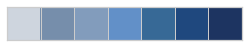

<Figure size 792x648 with 0 Axes>

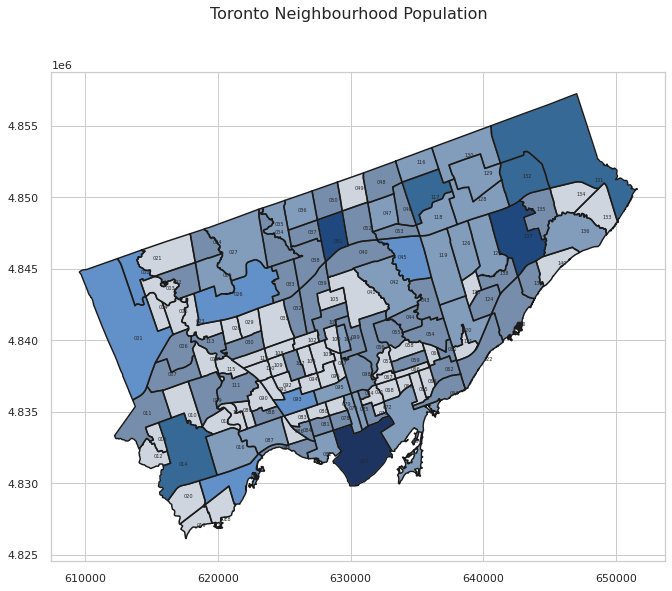

In [79]:
import numpy as np
def plot_comunas_data(sf, title, comunas, hood_id, data=None, color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = list(range(0,140))
    # for i in comunas:
    #     i = conv_comuna(i).upper()
    #     comuna_id.append(df[df.NOM_COMUNA == 
    #                         i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, hood_id,
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));  
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, hood_id,
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, hood_id[id], fontsize=5)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

def calc_color(data, color=None):
        if color   == 1: 
          color_sq =  ['#ced5deff','#768eabff','#829cbcff', '#6290c8ff','#376996ff','#1f487eff','#1d3461ff']; colors = color_sq; # blue
        elif color == 2: 
          color_sq = ['#cd5402ff','#e25c02ff','#f96502ff','#ed4c02ff','#e13301ff','#d51a01ff','#c80000ff']; colors = color_sq; # red 
          # color_sq = ['#f8f9faff','#ced4daff','#adb5bdff','#495057ff','#41474eff','#2e3338ff','#121417ff']; colors = color_sq;# gray
        elif color == 3: 
          color_sq = ['#f8f9faff','#ced4daff','#adb5bdff','#495057ff','#41474eff','#2e3338ff','#121417ff']; colors = color_sq;# gray
        # elif color == 9: 
        #   color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        elif color == 4:
          color_sq = ['#b2a496ff','#9d8977ff','#886e58ff','#735238ff','#5e3719ff','#553217ff','#4d2d15ff'];colors = color_sq; # coffee
        else:     
          color_sq =  ['#ced5deff','#768eabff','#829cbcff', '#6290c8ff','#376996ff','#1f487eff','#1d3461ff']; colors = color_sq; # blue
        new_data, bins = pd.cut(data, 7, retbins=True, labels=list(range(7)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=7)
            sns.palplot(colors, 0.6);
            for i in range(7):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2    3    4    5    6    7 ")    
        return color_ton, bins;
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

print_id = True # The shape id will be printed
color_pallete = 1 # blue
df = read_shapefile(sf)
nei_list= list(df['Neighbourh'])
pu= df['Population']
comuna_id = list(range(0,140))
hood_id = list(df['Hood_ID'])
plot_comunas_data(sf, 'Toronto Neighbourhood Population', nei_list,hood_id, pu, color_pallete, print_id)

We are also want to see the population in different age group. Check the donut chart below. As we can see most population in Toronto are in the working age group. Toronto does not need to worry about population ageing for now. 

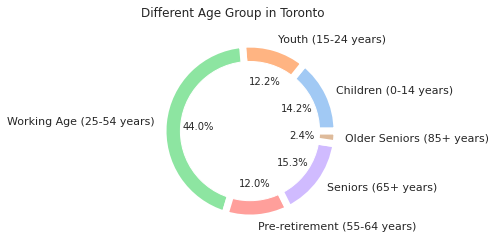

In [80]:
## pie chart for different age group 
age_data= nei_profile[9:15]
age_data.head()
pie_data= age_data[['Characteristic','City of Toronto']]
pie_data=pie_data.apply(lambda x: x.str.replace(',',''))

pie_data.head()
pie_data.shape


names = pie_data['Characteristic']
size = pie_data['City of Toronto']
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.8, color='white')

# Custom wedges
plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' },autopct="%.1f%%")
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Different Age Group in Toronto',loc='left')
plt.show()
p.savefig('gdrive/My Drive/foo.pdf')

Now we want to take a look at the male and female population profile in Toronto. We first read in the data.



In [81]:
# read in related data 
male_female= nei_profile[15:58]
male_female.reset_index(inplace=True)
male_female.head(20)


,index,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,...,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,15,16,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 0 to 04 years,"69,895",660,575,360,445,570,435,470,455,205,675,180,770,570,745,270,345,180,295,530,155,270,185,310,340,800,510,380,370,325,610,715,645,880,...,265,285,620,440,380,1200,380,300,565,455,900,330,535,710,685,560,650,265,995,355,115,450,1080,750,800,650,545,285,695,1195,355,620,1625,460,225,325,300,220,755,320
1,16,17,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 05 to 09 years,"69,350",695,540,270,365,660,355,230,395,260,795,195,790,580,800,245,315,240,250,610,135,240,210,355,155,755,520,445,340,310,510,750,775,790,...,255,270,575,440,450,1445,330,325,605,325,685,500,580,770,680,560,665,300,1060,315,85,480,465,800,915,560,565,305,740,1005,310,625,1705,400,180,350,305,220,685,315
2,17,18,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 10 to 14 years,"64,945",660,460,225,325,675,415,130,410,320,880,170,775,535,785,215,305,325,215,545,110,235,225,400,135,775,450,475,300,220,415,680,730,670,...,285,290,590,355,490,1405,295,340,550,330,450,545,485,655,620,425,620,325,805,270,85,440,285,820,950,555,460,290,740,865,265,610,1600,330,180,310,280,195,635,370
3,18,19,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 15 to 19 years,"74,240",840,780,285,465,715,490,585,520,385,880,210,955,585,765,245,365,410,215,580,135,300,230,495,440,895,480,585,305,195,350,710,720,665,...,365,345,695,310,485,1665,235,380,585,360,515,695,620,640,770,350,520,315,675,220,170,485,570,1040,1250,785,500,330,905,1290,415,680,1815,275,160,260,255,145,900,485
4,19,20,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 20 to 24 years,"97,415",1015,1000,355,1215,700,530,2485,735,445,765,215,1370,650,840,210,455,345,290,620,365,365,295,460,1810,965,490,540,445,245,385,965,870,1260,...,525,355,710,340,540,1825,210,340,645,705,740,670,775,640,920,485,500,410,610,525,590,535,3100,1005,1680,970,605,415,1030,2000,705,705,2310,255,200,385,345,260,1615,500
5,20,21,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 25 to 29 years,"113,905",1015,1045,355,2080,645,465,2115,1075,405,405,225,1135,530,725,255,575,205,420,595,555,365,445,375,2800,875,565,400,675,315,415,1045,750,2140,...,625,370,720,605,620,1565,220,280,490,1400,1045,490,905,675,915,625,485,330,695,1115,585,560,7875,835,1420,830,665,435,955,2715,790,655,2010,335,235,595,530,630,1545,465
6,21,22,Population,Age characteristics,Census Profile 98-316-X2016001,Male: 30 to 34 years,"108,895",835,820,410,1610,735,485,1695,1040,285,450,200,995,600,635,285,550,125,500,565,550,430,405,305,2450,905,660,430,

As we can see that row 16 is in the wong place. It is information about female population.Now we are going to fix this. 



In [82]:
wrong_row= male_female.iloc[16,:]
df1= male_female[0:16]
df2= male_female[17:22]
frames = [df1, df2]
male_data= pd.concat(frames)
male_female
df3= male_female[22:24]
df3=df3.append(wrong_row)
df4= male_female[24:42]
frames= [df3,df4]
female_data= pd.concat(frames)
female_data.reset_index(inplace= True)
f_list= list(female_data['City of Toronto'])
m_list= list(male_data['City of Toronto'])
new_frame=pd.DataFrame(columns=['Age Group','Male', 'Female'])
new_frame['Male']=m_list
new_frame['Female']= f_list
age_group= male_data['Characteristic']
age_group_list=[]
for i in age_group:
  index= age_group[age_group == i].index[0]
  i= i.replace('Male:','').replace('to', '-').replace('years','').replace('04','4').replace('05','5').replace('09','9').replace('100  and over', '100>' )
  age_group_list.append(i)
new_frame['Age Group' ]= age_group_list
new_frame=new_frame.apply(lambda x: x.str.replace(',',''))
new_frame['Male']=new_frame['Male'].apply(lambda x:float(x) )
new_frame['Female']= new_frame['Female'].apply(lambda x:float(x) )
print(new_frame.head())

   Age Group     Male   Female
0     0 - 4   69895.0  66105.0
1     5 - 9   69350.0  65680.0
2   10 - 14   64945.0  62165.0
3   15 - 19   74240.0  71285.0
4   20 - 24   97415.0  97330.0


The above dataframe shows the 
Now we have clean the data and we can plot. Female population is a little more than male population in most age groups.

Text(0, 0.5, 'Population')

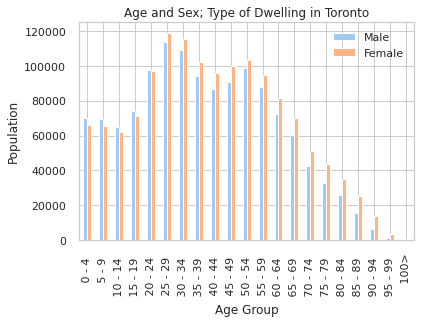

In [83]:
ax=new_frame.plot(kind="bar",title="Age and Sex; Type of Dwelling in Toronto",)
ax.set_xticklabels(new_frame['Age Group'])
ax.set_xlabel("Age Group")
ax.set_ylabel('Population')


 ### Crimes
Now we can see the crime distribution in each neighbourhoods. We are interested in Assault, AutoThef, Breakand, Homicide, Robbery and TheftOve. First we need to do some data wraggling.

In [84]:
new_data_frame=pd.DataFrame()
# new_data_frame= df [['Assault_AV', 'AutoThef_6', 'Breakand_6', 'Homicide_A', 'Robbery_AV', 'TheftOve_6' ]].mean()
new_data_frame['Neighbourh'] =df['Neighbourh']
new_data_frame['crimes']=(df['Assault_AV']+ df['AutoThef_6']+df['Breakand_6']+df['Homicide_A']+df['Robbery_AV']+df['TheftOve_6'])/6.0
crimes_number= list(new_data_frame['crimes'])
# print(new_data_frame.head())
# print(max(crimes_number))
# print(min(crimes_number))
new_data_frame['average_crime_percentage'] = list( map(lambda x: x/sum(crimes_number), crimes_number))
print(new_data_frame.head())

                Neighbourh      crimes  average_crime_percentage
0           Yonge-St.Clair   11.433333                  0.001990
1  York University Heights  110.933333                  0.019305
2         Lansing-Westgate   26.100000                  0.004542
3       Yorkdale-Glen Park   55.700000                  0.009693
4      Stonegate-Queensway   31.900000                  0.005551


With the average_crime_percentage, we have the below choropleth map.


1: 9 => 38 
2: 39 => 67 
3: 68 => 96 
4: 97 => 126 
5: 127 => 155 
6: 156 => 185 
7: 186 => 214 

   1   2    3    4    5    6    7 


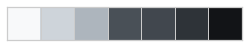

<Figure size 792x648 with 0 Axes>

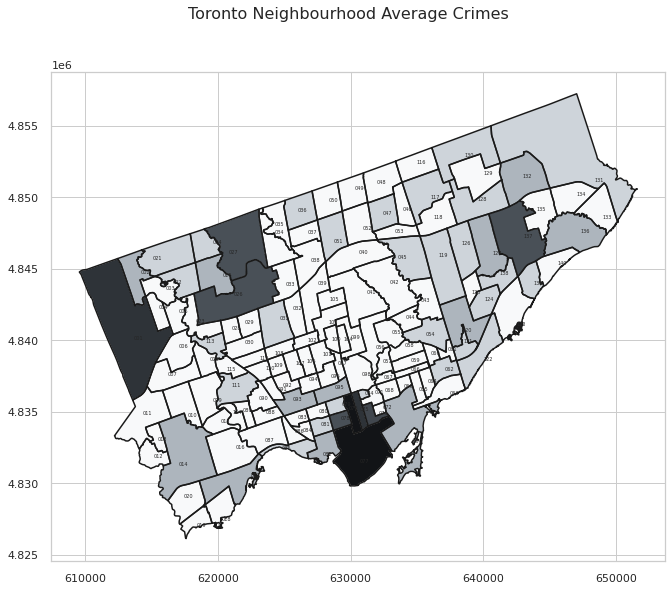

In [85]:
print_id = True # The shape id will be printed
color_pallete = 3 # 'Purples'
plot_comunas_data(sf, 'Toronto Neighbourhood Average Crimes', nei_list,hood_id, crimes_number, color_pallete, print_id)

### income 
Now let us look at incomes. 


1: 25706 => 66276 
2: 66277 => 106565 
3: 106566 => 146854 
4: 146855 => 187142 
5: 187143 => 227431 
6: 227432 => 267720 
7: 267721 => 308009 

   1   2    3    4    5    6    7 


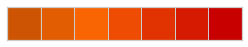

<Figure size 792x648 with 0 Axes>

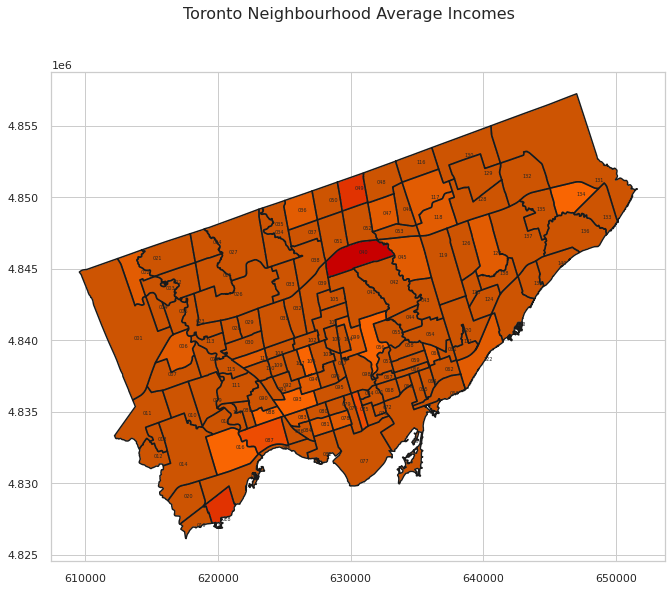

In [86]:
average_income= pd.DataFrame(nei_profile.loc[2272,:])
average_income=average_income.transpose()
# print(average_income.shape)
# print(average_income.columns)

for i in range(0,146):
  a= average_income.iloc[0,i]
  try:
    a=float(a.replace(",",""))
    average_income.iloc[0,i]=a
  except:
    pass


# print(average_income.head())
# print(a)
# average_income=average_income.astype('float', errors='ignore',inplace=True)

average_income.reset_index(inplace=True)
temp= []
temp2=[]
for i in range(6,147):
  value= average_income.iloc[0,i]
  temp2.append(float(value))
  temp.append(float(value))
total_income = sum(temp)
for i in range(6,147):
  average_income.iloc[0,i]= float(average_income.iloc[0,i])/total_income
  # temp2.append(float(average_income.iloc[0,i]))
average_income_grouped= average_income.transpose()
average_income_grouped.columns= ['income']


average_income_grouped.iloc[0:7].index
average_income_grouped.drop(average_income_grouped.iloc[0:7].index,inplace=True)
average_income_grouped.shape
average_income_list= list(average_income_grouped['income'])
print_id = True # The shape id will be printed
color_pallete = 2 # 'Purples'
plot_comunas_data(sf, 'Toronto Neighbourhood Average Incomes', nei_list,hood_id, temp2, color_pallete, print_id)



### Ethnics

As the objective is to open an Eastern Asian restaurant. We are interested to know how Eastern Asian population in each neighbor. The line chart shows the population of Chinese, Japanese and Korean population in each neighborhood. (Click to zoom in)

Index(['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex',
       'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor',
       'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=140)
<class 'str'>
(3, 140)
<class 'float'>
     Agincourt North  ... Yorkdale-Glen Park
1601           16950  ...               1130
1603              60  ...                 65
1605             100  ...                 50

[3 rows x 140 columns]


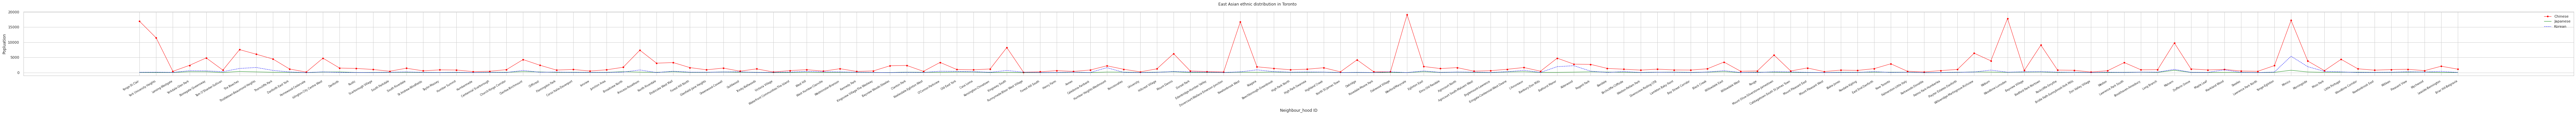

In [103]:
ethnic= pd.DataFrame()
ethnic=nei_profile[1349:1609]
# print(ethnic[ethnic['Characteristic']==' Chinese'])
select_ethnics =  [ ethnic[ethnic['Characteristic']==' Chinese' ], ethnic[ethnic['Characteristic']==' Japanese'], ethnic[ethnic['Characteristic']==' Korean']]
East_Asian = pd.concat(select_ethnics )
East_Asian.drop(East_Asian.columns[0:4], axis=1, inplace=True)
East_Asian=East_Asian.apply(lambda x: x.str.replace(',',''))
East_Asian.drop(['City of Toronto', 'Characteristic'], axis=1, inplace=True)

print(East_Asian.columns)
print(type(East_Asian.iloc[2,9]))
print(East_Asian.shape)

for i in range(0,3):
  for j in range(0,140):
    a= float(East_Asian.iloc[i,j])
    East_Asian.iloc[i,j]=a
print(type(East_Asian.iloc[2,9]))
# # for col in East_Asian.columns: 
# #     print(len(col))

# #     East_Asian[col] = East_Asian[col].astype('float', errors='ignore',inplace=True)




print(East_Asian.head(20))
Chinese= list(East_Asian.iloc[0 ,:])
Japanese=list(East_Asian.iloc[1 ,:])
Korean= list(East_Asian.iloc[2,:])
ethnic_plot_data= pd.DataFrame(columns=['Neighbours','Chinese', 'Japanese', 'Korean'])
ethnic_plot_data['Neighbours']=nei_list
ethnic_plot_data['Chinese'] = Chinese
ethnic_plot_data['Japanese']=Japanese
ethnic_plot_data['Korean'] = Korean
ethnic_plot_data.head(10)




fig = plt.figure(figsize=(140,4)) 

plt.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()
plt.plot( 'Neighbours', 'Chinese', data=ethnic_plot_data, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=1)
plt.plot( 'Neighbours', 'Japanese', data=ethnic_plot_data, marker='', color='green', linewidth=1)
plt.plot( 'Neighbours', 'Korean', data=ethnic_plot_data, marker='', color='blue', linewidth=1, linestyle='dashed', label="Korean")
# show legend
plt.legend()
fig.suptitle('East Asian ethnic distribution in Toronto')
plt.xlabel('Neighbour_hood ID')
plt.ylabel('Popluation')
# show graph
plt.show() # click to zoom in 
fig.savefig('gdrive/My Drive/ethnic.pdf')

##Foursquare API

After investigated on the above features. We want to look at the venues of each neighborhood. We are going to use the Foursquare API to get the venues data.

In [104]:
# get the venues from frousqaure API, develper information 

CLIENT_ID = 'ZEZ431RSZPCTOQXJV4PWNN2E2O0GC0PKLOSO1AZHLLPAWFXZ' # your Foursquare ID
CLIENT_SECRET = 'NKXUGSAS5MA3V4ZRPQBMHFM41HSGUO3EXK1O0OJUTQBZEU0X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 20 # A default Foursquare API limit value
radius= 5000
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    counter=0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        counter+=1
        # print(counter)
        # print(venues_list)
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [105]:
Toronto_venues = getNearbyVenues(names=nei_cdi['Suburbs'],
                                   latitudes=nei_cdi['latitude'],
                                   longitudes=nei_cdi['longtitude'])

Toronto_venues.to_csv('gdrive/My Drive/Toronto_venues.csv')

KeyError: ignored

In [106]:

Toronto_venues=pd.read_csv('gdrive/My Drive/Toronto_venues.csv')

In [107]:
Toronto_venues.groupby('Neighborhood').count()

,Unnamed: 0,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Agincourt North,20,20,20,20,20,20,20
Agincourt South-Malvern West,20,20,20,20,20,20,20
Alderwood,20,20,20,20,20,20,20
Annex,20,20,20,20,20,20,20
Banbury-Don Mills,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...
Wychwood,20,20,20,20,20,20,20
Yonge-Eglinton,20,20,20,20,20,20,20
Yonge-St.Clair,20,20,20,20,20,20,20


Let us see how many categories are here.

In [108]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 179 uniques categories.


In [109]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] =Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot['Neighborhood']
first_column = Toronto_onehot.pop('Neighborhood')
Toronto_onehot.insert(0, 'Neighborhood', first_column)
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,Zoo Exhibit,Airport,Airport Lounge,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Campground,Caribbean Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,...,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Ski Chalet,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.00,0.00,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.00,0.0,0.20,0.00,0.05,0.00,0.0,0.00,0.00,0.0,...,0.0,0.05,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.05,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.0,0.0
1,Agincourt South-Malvern West,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.05,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.05,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.00,0.0,0.15,0.00,0.00,0.00,0.0,0.00,0.05,0.0,...,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.00,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.0,0.0
2,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.05,0.0,0.05,0.0,0.00,0.00,0.00,0.05,0.0,0.05,0.00,0.0,...,0.0,0.05,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,Annex,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.05,0.00,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.05,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
4,Banbury-Don Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.05,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.00,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.10,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


After combine same categories, we can see the 'likeness' of each category in each neighborhood.

In [110]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()

key_words=['Asian Restaurant','Chinese Restaurant','Filipino Restaurant','Hotpot Restaurant','Indian Restaurant','Japanese Restaurant',\
          'Korean Restaurant', 'Ramen Restaurant','Sushi Restaurant','Szechuan Restaurant','Thai Restaurant','Tibetan Restaurant','Vietnamese Restaurant',\
           'Xinjiang Restaurant','Neighborhood']

for i in Toronto_grouped.columns:
  if i not in key_words:
    Toronto_grouped.drop(i,axis=1,inplace=True)


# manhattan_grouped.head()
Toronto_grouped.head()

,Neighborhood,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant
0,Agincourt North,0.05,0.05,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
1,Agincourt South-Malvern West,0.05,0.00,0.0,0.0,0.15,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05
2,Alderwood,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,Annex,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,Banbury-Don Mills,0.00,0.00,0.0,0.0,0.00,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Now we want know top ten popular restaurants in each neighbourhood.

In [111]:
num_top_venues = 20

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt North----
                    venue  freq
0       Indian Restaurant  0.10
1        Asian Restaurant  0.05
2      Chinese Restaurant  0.05
3     Filipino Restaurant  0.00
4       Hotpot Restaurant  0.00
5     Japanese Restaurant  0.00
6       Korean Restaurant  0.00
7        Ramen Restaurant  0.00
8        Sushi Restaurant  0.00
9     Szechuan Restaurant  0.00
10        Thai Restaurant  0.00
11     Tibetan Restaurant  0.00
12  Vietnamese Restaurant  0.00
13    Xinjiang Restaurant  0.00


----Agincourt South-Malvern West----
                    venue  freq
0       Indian Restaurant  0.15
1        Asian Restaurant  0.05
2        Sushi Restaurant  0.05
3     Xinjiang Restaurant  0.05
4      Chinese Restaurant  0.00
5     Filipino Restaurant  0.00
6       Hotpot Restaurant  0.00
7     Japanese Restaurant  0.00
8       Korean Restaurant  0.00
9        Ramen Restaurant  0.00
10    Szechuan Restaurant  0.00
11        Thai Restaurant  0.00
12     Tibetan Restaurant  0.00
13  Vietn

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now we can see the top 10 popular resturants!

In [114]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Xinjiang Restaurant,Vietnamese Restaurant,Tibetan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Ramen Restaurant
1,Agincourt South-Malvern West,Indian Restaurant,Xinjiang Restaurant,Sushi Restaurant,Asian Restaurant,Vietnamese Restaurant,Tibetan Restaurant,Thai Restaurant,Szechuan Restaurant,Ramen Restaurant,Korean Restaurant
2,Alderwood,Xinjiang Restaurant,Vietnamese Restaurant,Tibetan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
3,Annex,Xinjiang Restaurant,Vietnamese Restaurant,Tibetan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Japanese Restaurant,Indian Restaurant
4,Banbury-Don Mills,Japanese Restaurant,Xinjiang Restaurant,Vietnamese Restaurant,Tibetan Restaurant,Thai Restaurant,Szechuan Restaurant,Sushi Restaurant,Ramen Restaurant,Korean Restaurant,Indian Restaurant


In [115]:
ethnic= pd.DataFrame()
ethnic=nei_profile[1349:1609]
# print(ethnic[ethnic['Characteristic']==' Chinese'])
select_ethnics =  [ ethnic[ethnic['Characteristic']==' Chinese' ], ethnic[ethnic['Characteristic']==' Japanese'], ethnic[ethnic['Characteristic']==' Korean']]
East_Asian = pd.concat(select_ethnics )
East_Asian.drop(East_Asian.columns[0:4], axis=1, inplace=True)
East_Asian=East_Asian.apply(lambda x: x.str.replace(',',''))

# percentage= []
# East_Asian
East_Asian.iloc[0,141]
for i in range(0, East_Asian.shape[0]):
  total= East_Asian.iloc[i,1]
  print(total)
  for n in range(2,142):
    East_Asian.iloc[i,n]=float(East_Asian.iloc[i,n]) / float(total)

East_Asian_grouped = East_Asian.transpose()
East_Asian_grouped = East_Asian_grouped.drop('City of Toronto')
East_Asian_grouped.columns = East_Asian_grouped.iloc[0,0:]
East_Asian_grouped = East_Asian_grouped.drop('Characteristic')
# East_Asian_grouped.replace({'Characteristic': 'Suburbs'}, inplace= True)
East_Asian_grouped[[' Chinese', ' Japanese', ' Korean']]

332830
17265
43455


Characteristic,Chinese,Japanese,Korean
Agincourt North,0.0509269,0.00347524,0.00230123
Agincourt South-Malvern West,0.034417,0.00347524,0.00333679
Alderwood,0.00126191,0.00289603,0.00172592
Annex,0.00721089,0.0165074,0.0146128
Banbury-Don Mills,0.014572,0.0159282,0.0132321
...,...,...,...
Wychwood,0.00300454,0.00492326,0.00310666
Yonge-Eglinton,0.00330499,0.00839849,0.0059832
Yonge-St.Clair,0.00193793,0.0107153,0.00356691
York University Heights,0.00632455,0.00144802,0.00931999


Besides ethnics, we also consider incomes 


In [117]:
average_income= pd.DataFrame(nei_profile.loc[2272,:])
average_income=average_income.transpose()
for i in range(0,146):
  a= average_income.iloc[0,i]
  try:
    a=float(a.replace(",",""))
    average_income.iloc[0,i]=a
  except:
    pass
# average_income=average_income.apply(lambda x: x.str.replace(',',''))
average_income.reset_index(inplace=True)
temp= []
for i in range(6,147):
  value= average_income.iloc[0,i]
  temp.append(float(value))
total_income = sum(temp)
for i in range(6,147):
  average_income.iloc[0,i]= float(average_income.iloc[0,i])/total_income

average_income_grouped= average_income.transpose()
average_income_grouped.columns= ['income']


average_income_grouped.iloc[0:7].index
average_income_grouped.drop(average_income_grouped.iloc[0:7].index,inplace=True)
average_income_grouped.shape
print(average_income_grouped.head())

average_income_list= list(average_income_grouped['income'])


                                  income
Agincourt North               0.00390571
Agincourt South-Malvern West  0.00408691
Alderwood                      0.0061267
Annex                          0.0144812
Banbury-Don Mills             0.00870123


## Final dataframe
Now we gather all features that investigated before and put them into one data frame.

In [118]:

East_Asian_grouped[[' Chinese', ' Japanese', ' Korean']]
East_Asian_grouped[[' Chinese'] ]
chinese= []
japanese=[]
Korea=[]
for i in range(0,140):
  chinese.append(East_Asian_grouped.iloc[i,0])
  japanese.append(East_Asian_grouped.iloc[i,1])
  Korea.append(East_Asian_grouped.iloc[i,2])

Toronto_grouped['Population']=pu
Toronto_grouped['Chinese'] = chinese
Toronto_grouped['Japanese']= japanese
Toronto_grouped['Korean']= Korea
Toronto_grouped.head()
income_lst= []
for i in range(0,140):
  income_lst.append(average_income_grouped.iloc[i,0])

Toronto_grouped['income']= income_lst
Toronto_grouped['crime']=new_data_frame['average_crime_percentage']
Toronto_grouped.head()


,Neighborhood,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
0,Agincourt North,0.05,0.05,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,12528,0.050927,0.003475,0.002301,0.003906,0.001990
1,Agincourt South-Malvern West,0.05,0.00,0.0,0.0,0.15,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05,27593,0.034417,0.003475,0.003337,0.004087,0.019305
2,Alderwood,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,16164,0.001262,0.002896,0.001726,0.006127,0.004542
3,Annex,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,14804,0.007211,0.016507,0.014613,0.014481,0.009693
4,Banbury-Don Mills,0.00,0.00,0.0,0.0,0.00,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,25051,0.014572,0.015928,0.013232,0.008701,0.005551


## K_Mean Clustering and  AffinityPropagation

After collecting features, we now apply K_mean Clustering to cluster neighbourhoods

In [120]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np 
manhattan_grouped_clustering = Toronto_grouped.drop('Neighborhood',axis=1)
X = manhattan_grouped_clustering
X = np.nan_to_num(X)
Clus_dataSet = MinMaxScaler().fit_transform(X)
Clus_dataSet
X

array([[0.05      , 0.05      , 0.        , ..., 0.00230123, 0.00390571,
        0.00198966],
       [0.05      , 0.        , 0.        , ..., 0.00333679, 0.00408691,
        0.0193049 ],
       [0.        , 0.        , 0.        , ..., 0.00172592, 0.0061267 ,
        0.00454199],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00356691, 0.01466202,
        0.0038807 ],
       [0.05      , 0.        , 0.        , ..., 0.00931999, 0.00384715,
        0.00281916],
       [0.        , 0.        , 0.        , ..., 0.00115062, 0.00494757,
        0.00450428]])

### Find the optimal K value
Now let us apply Silhouetter Score to find the maximum number of clusters.

27


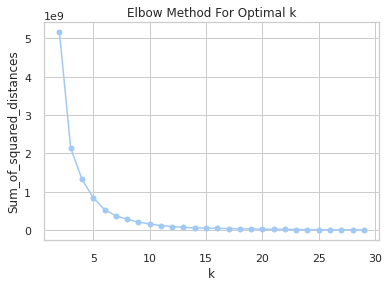

AttributeError: ignored

In [121]:
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    # print(k)
    km = KMeans(n_clusters=k,random_state=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances.index(min(Sum_of_squared_distances)))
Sum_of_squared_distances
a=plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
a.savefig('gdrive/My Drive/elbow.pdf')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e550c190>,
                 k=None, metric=None, model=None, timings=True)

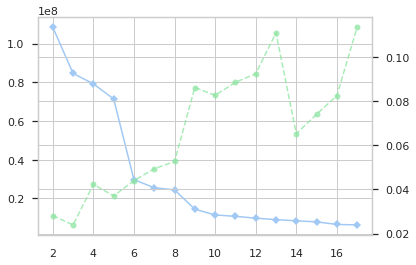

In [122]:
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs

# from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model, k=(2,18))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn
#

#
# km = KMeans(n_clusters=3, random_state=0)
# #
# # Fit the KMeans model
# #
# km.fit_predict(Clus_dataSet)
# #
# # Calculate Silhoutte Score
# #
# score = sklearn.metrics.silhouette_score(Clus_dataSet, km.labels_, metric='euclidean')

# print('Silhouetter Score: %.3f' % score)

K = range(5,10)
scorels= []
for k in K:
    # print(k)
    km = KMeans(n_clusters=k,random_state=10)
    km = km.fit(X)
    # print(k)
    score = sklearn.metrics.silhouette_score(X, km.labels_, metric='euclidean')
    # print(score)
    scorels.append(score)

b=plt.plot(K, scorels, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouetter Score')
plt.title('Silhouetter Score For Optimal k')
plt.show()
print(scorels.index(max(scorels)))
print(max(scorels))
plt.savefig('gdrive/My Drive/Silhouetter.pdf')

According to the above Silhouetter Score and based on the Elbow Method, the optimal K can be set to 8. 

In [123]:
km = KMeans(n_clusters=7, random_state=0)

km.fit_predict(Clus_dataSet)
klabels = km.labels_
print(klabels)
len(klabels)

[4 3 0 0 6 0 2 6 2 0 6 3 2 0 0 6 0 0 6 2 6 0 0 2 0 0 3 0 0 0 6 0 0 0 6 0 0
 3 1 6 6 2 0 0 0 0 0 3 0 0 0 0 0 6 0 1 6 0 2 0 6 3 0 1 0 6 4 6 0 0 0 5 0 0
 6 0 4 2 3 2 6 1 0 0 0 2 2 0 0 2 0 2 6 0 0 0 1 0 6 0 2 1 0 5 2 0 0 6 3 5 0
 2 4 0 6 2 0 1 0 6 0 2 0 3 1 2 6 0 0 2 2 6 3 0 0 0 0 2 0 6]


140

LEt's label all neighborhoods



In [124]:
neighborhoods_lables= pd.DataFrame()
# neighborhoods_lables[['Neighborhood','klabels']]=[nei_list,klabels]
neighborhoods_lables= pd.DataFrame(
    {'Neighborhood': nei_list,
     'klabels': klabels,})
neighborhoods_lables.head(10)

,Neighborhood,klabels
0,Yonge-St.Clair,4
1,York University Heights,3
2,Lansing-Westgate,0
3,Yorkdale-Glen Park,0
4,Stonegate-Queensway,6
5,Tam O'Shanter-Sullivan,0
6,The Beaches,2
7,Thistletown-Beaumond Heights,6
8,Thorncliffe Park,2
9,Danforth East York,0


For comparison purpose, we also apply AffinityPropagation. 

In [125]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
# X=Clus_dataSet
af = AffinityPropagation(preference=None).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
# af = AffinityPropagation.fit(data_transformed)
# cluster_centers_indices = af.cluster_centers_indices_
# labels = af.labels_
print(max(labels))
print(labels)
print(cluster_centers_indices)

-1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[]


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


In [126]:
# neighborhoods_lables['alabels']=labels
neighborhoods_lables.head(20)
temp_df=Toronto_grouped.iloc[:,1:]
temp_df.head()
# Toronto_grouped.drop('klables',axis=1,inplace=True)
Toronto_grouped.insert(1,'klables',klabels)
Toronto_grouped.head()

,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
0,Agincourt North,4,0.05,0.05,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,12528,0.050927,0.003475,0.002301,0.003906,0.001990
1,Agincourt South-Malvern West,3,0.05,0.00,0.0,0.0,0.15,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.05,27593,0.034417,0.003475,0.003337,0.004087,0.019305
2,Alderwood,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,16164,0.001262,0.002896,0.001726,0.006127,0.004542
3,Annex,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,14804,0.007211,0.016507,0.014613,0.014481,0.009693
4,Banbury-Don Mills,6,0.00,0.00,0.0,0.0,0.00,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,25051,0.014572,0.015928,0.013232,0.008701,0.005551


### Evaluation
Now, we look at neighbourhoods in each cluster and find out their similarities.

## Cluster_0
We can see that neighbourhoods in Cluster 0 have a lot of Janpanes resutrant. However, other tyoes of resutrants are not so popular. 

In [127]:
from IPython.display import display
Lable_0 = Toronto_grouped[Toronto_grouped['klables'] ==0 ]
print(Lable_0.shape)
Lable_0.head(28)
# # Lable_0.style
# def color_negative_red(val):
#     color = 'red' if val < 0.5 else 'black'
#     return 'color: %s' % color

# Lable_0 = Lable_0.style.applymap(color_negative_red)
# display(Lable_0)

(68, 22)


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
2,Alderwood,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,16164,0.001262,0.002896,0.001726,0.006127,0.004542
3,Annex,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,14804,0.007211,0.016507,0.014613,0.014481,0.009693
5,Bathurst Manor,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,27446,0.002479,0.002027,0.007019,0.005899,0.006651
9,Bedford Park-Nortown,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,17180,0.003560,0.005502,0.004833,0.015805,0.003217
13,Black Creek,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,9941,0.004131,0.002317,0.001266,0.003337,0.002944
14,Blake-Jones,0,0.05,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,16724,0.003110,0.004344,0.000345,0.006230,0.007425
16,Bridle Path-Sunnybrook-York Mills,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,27876,0.004342,0.005792,0.005063,0.039554,0.013226
17,Broadview North,0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,17812,0.001758,0.004054,0.001956,0.005722,0.004789
21,Casa Loma,0,0.00,0.00,0.0,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13362,0.001352,0.006371,0.002416,0.021195,0.002465
22,Centennial Scarborough,0,0.00,0.05,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,31340,0.002929,0.006371,0.001036,0.006940,0.030181


##Cluster_1
Neighbourhoods in Cluster 1 do not have a strong prefer for Asian resutrants. These area luck of Asian resutrants. Let us do a further investigate on this

In [140]:
Lable_1= Toronto_grouped[Toronto_grouped['klables'] ==1 ]
print(Lable_1.shape)
Lable_1.head(40)

(8, 22)


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
38,Elms-Old Rexdale,1,0.15,0.05,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,17510,0.000571,0.000869,0.002416,0.004111,0.005618
55,Humbermede,1,0.15,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,15723,0.001968,0.001448,0.001381,0.003792,0.003820
63,Kingsview Village-The Westway,1,0.10,0.10,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25003,0.001622,0.002317,0.005063,0.004710,0.010209
81,Mount Olive-Silverstone-Jamestown,1,0.10,0.10,0.0,0.0,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,22372,0.001908,0.001158,0.001381,0.003409,0.006039
96,Pelmo Park-Humberlea,1,0.10,0.05,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,16936,0.001337,0.001448,0.000805,0.005009,0.005009
101,Rexdale-Kipling,1,0.15,0.10,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,29658,0.001007,0.002027,0.000460,0.004420,0.006265
117,Thistletown-Beaumond Heights,1,0.15,0.10,0.0,0.0,0.15,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,27051,0.000571,0.001738,0.000920,0.004214,0.007236
124,West Humber-Clairville,1,0.10,0.10,0.0,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10111,0.002644,0.003475,0.001381,0.004080,0.001984


The above selected neighbourhoods currently how no interests in Asian Restaurants. However, these neighbourhoods have high population and residents are with relatively high inocme. As a result, these neighborhoods should be considered for potential Eastern Asian Resuturant to open. 

In [148]:
Lable_1_population = Lable_1[(Lable_1['Population'] >=10000) &( Lable_1['income'] >0.002)  ]
Lable_1_population.head()

,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
38,Elms-Old Rexdale,1,0.15,0.05,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,17510,0.000571,0.000869,0.002416,0.004111,0.005618
55,Humbermede,1,0.15,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,15723,0.001968,0.001448,0.001381,0.003792,0.003820
63,Kingsview Village-The Westway,1,0.10,0.10,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25003,0.001622,0.002317,0.005063,0.004710,0.010209
81,Mount Olive-Silverstone-Jamestown,1,0.10,0.10,0.0,0.0,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,22372,0.001908,0.001158,0.001381,0.003409,0.006039
96,Pelmo Park-Humberlea,1,0.10,0.05,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,16936,0.001337,0.001448,0.000805,0.005009,0.005009


## Cluster-2
Neighborhoods in Cluster 3 all have a preference for Thai Restaurants. In the same time, population in these neighborhoods are high. Most neighborhoods have a population more than 10000.

In [149]:
Lable_2= Toronto_grouped[Toronto_grouped['klables'] ==2 ]
print(Lable_2.shape)
Lable_2.head(20)

(22, 22)


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
6,Bay Street Corridor,2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,21567,0.022789,0.022299,0.031527,0.007259,0.005392
8,Bayview Woods-Steeles,2,0.0,0.05,0.00,0.0,0.00,0.00,0.10,0.00,0.00,0.05,0.05,0.0,0.00,0.0,21108,0.013460,0.006661,0.016799,0.006067,0.004409
12,Birchcliffe-Cliffside,2,0.0,0.00,0.00,0.0,0.05,0.00,0.00,0.00,0.05,0.00,0.05,0.0,0.00,0.0,9666,0.004477,0.013032,0.000805,0.006981,0.004090
19,Cabbagetown-South St.James Town,2,0.0,0.00,0.00,0.0,0.00,0.05,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,12416,0.002569,0.004054,0.002416,0.008092,0.008107
23,Church-Yonge Corridor,2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,26984,0.012935,0.018245,0.016569,0.006881,0.013142
41,Etobicoke West Mall,2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,33312,0.001427,0.002317,0.006789,0.004913,0.027606
58,Islington-City Centre West,2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,10948,0.006760,0.010715,0.037395,0.006779,0.002486
77,Mimico,2,0.0,0.00,0.00,0.0,0.05,0.00,0.00,0.00,0.10,0.00,0.05,0.0,0.00,0.0,22776,0.006039,0.016507,0.012657,0.006991,0.009038
79,Moss Park,2,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,0.00,0.0,29113,0.004957,0.008109,0.004372,0.007566,0.005601
85,Newtonbrook East,2,0.0,0.00,0.00,0.0,0.00,0.05,0.15,0.00,0.00,0.00,0.05,0.0,0.00,0.0,15873,0.014317,0.004344,0.045104,0.005806,0.003512


##Cluster-3
Neighborhoods in Cluster3 has a strong preference for Xinjiang Restaurants and the residents incomes in these neighborhoods are stable around 0.004.

In [150]:
Lable_3= Toronto_grouped[Toronto_grouped['klables'] ==3 ]
print(Lable_3.shape)
Lable_3.head(10)

(10, 22)


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
1,Agincourt South-Malvern West,3,0.05,0.00,0.0,0.0,0.15,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.05,27593,0.034417,0.003475,0.003337,0.004087,0.019305
11,Bendale,3,0.05,0.05,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.05,43965,0.014317,0.010426,0.005408,0.004271,0.015911
26,Cliffcrest,3,0.00,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,14133,0.003125,0.006661,0.001381,0.005743,0.004443
37,Eglinton East,3,0.00,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,16556,0.003696,0.005213,0.001036,0.003857,0.007605
47,Guildwood,3,0.00,0.00,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,11058,0.001262,0.006371,0.001151,0.006832,0.003811
61,Kennedy Park,3,0.05,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.00,0.0,0.0,0.0,0.05,0.05,16934,0.003726,0.008398,0.002186,0.003978,0.003921
78,Morningside,3,0.00,0.00,0.0,0.0,0.05,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.05,9456,0.003996,0.004054,0.001726,0.004147,0.002874
108,Scarborough Village,3,0.00,0.00,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,10722,0.001998,0.003186,0.000460,0.004227,0.004498
123,West Hill,3,0.00,0.00,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,11785,0.003651,0.004344,0.001841,0.004279,0.005079
132,Woburn,3,0.00,0.00,0.0,0.0,0.10,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.00,0.05,15559,0.013175,0.008109,0.005178,0.003965,0.004928


## Cluster-4
Cluster 4 is a quite interesting cluster. It only conatins two neighbourhoods. These two neighbourhoods show a strong preference for Japanese Resaurant, Ramen Resturant and Thai Resaurant. They also have the hihest number of residents with Japnese ethnics. 

In [151]:
Lable_4= Toronto_grouped[Toronto_grouped['klables'] ==4 ]
print(Lable_4.shape)
Lable_4.head()


(4, 22)


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
0,Agincourt North,4,0.05,0.05,0.0,0.0,0.10,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,12528,0.050927,0.003475,0.002301,0.003906,0.001990
66,Lambton Baby Point,4,0.00,0.00,0.0,0.0,0.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,23831,0.050311,0.008688,0.005638,0.004087,0.008191
76,Milliken,4,0.00,0.10,0.0,0.0,0.00,0.05,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,27917,0.057507,0.002317,0.000460,0.003607,0.011720
112,Steeles,4,0.00,0.25,0.0,0.0,0.00,0.00,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,7865,0.053586,0.005502,0.003222,0.004082,0.001839


## Cluster-5
Neighborhoods in Cluster 5 has a strong preference for Asian Restaurant. However, the Chinese population are not the highest.

In [152]:
Lable_5= Toronto_grouped[Toronto_grouped['klables'] ==5 ]
print(len(Lable_5))
Lable_5.head(8)

3


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
71,Little Portugal,5,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,12494,0.004822,0.008109,0.004027,0.005873,0.003466
103,Roncesvalles,5,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,10529,0.002148,0.005502,0.001726,0.006495,0.003933
109,South Parkdale,5,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,7804,0.003155,0.006082,0.002531,0.004521,0.003428


## Cluster-6 
Neighborhoods in Cluster-6 shows a certain level of interest on various type of Asian restaurants. However, they do not show a strong preference on a specific type. 

In [153]:
Lable_6= Toronto_grouped[Toronto_grouped['klables'] ==6 ]
print(len(Lable_6))
Lable_6.head()

25


,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
4,Banbury-Don Mills,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25051,0.014572,0.015928,0.013232,0.008701,0.005551
7,Bayview Village,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10360,0.018223,0.013611,0.038776,0.006682,0.003353
10,Beechborough-Greenbrook,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14365,0.000511,0.000579,0.000345,0.004344,0.003127
15,Briar Hill-Belgravia,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21849,0.001352,0.005792,0.002877,0.004465,0.010262
18,Brookhaven-Amesbury,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15683,0.002704,0.002606,0.000920,0.004171,0.005563


In [154]:
Lable_6_population = Lable_6[(Lable_6['Population'] >=20000) &( Lable_6['income'] >0.004)  ]
Lable_6_population.head()

,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
4,Banbury-Don Mills,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25051,0.014572,0.015928,0.013232,0.008701,0.005551
15,Briar Hill-Belgravia,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21849,0.001352,0.005792,0.002877,0.004465,0.010262
34,Dufferin Grove,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30491,0.002764,0.005502,0.002992,0.005212,0.013443
39,Englemount-Lawrence,6,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65913,0.002028,0.002027,0.004372,0.006181,0.037479
40,Eringate-Centennial-West Deane,6,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27392,0.002914,0.006661,0.009090,0.006036,0.016929


Now, let us show these cluster in the map.

In [155]:
label_frame= pd.DataFrame({'Neighbours':nei_list, 'klabels':klabels})
label_frame.head()
label_frame.set_index("Neighbours", inplace = True)
a= label_frame.loc['Yonge-St.Clair','klabels']
print(a)

4


In [156]:
color_pallete2= ['#3186cc', '#cc3131','#cc8131','#a5cc31','#8631cc','#a8cc31','#3139cc']

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,8))
%matplotlib inline
sf = shp.Reader('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
sf.shapes()
import geopandas
radius = 5
shp_file = geopandas.read_file('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
shp_file.to_file('myshpfile.geojson', driver='GeoJSON')
m = folium.Map(location=[43.65, -79.347])
for i in range(0,140):
  name= new_cor.iloc[i,0]
  la= new_cor.iloc[i,1]
  lo= new_cor.iloc[i,2]
  cluster= label_frame.loc[name,'klabels']
  if cluster ==0:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[0],fill=True,fill_color=color_pallete2[0],).add_to(m)
  elif cluster==1:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[1],fill=True,fill_color=color_pallete2[1],).add_to(m)
  elif cluster==2:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[2],fill=True,fill_color=color_pallete2[2],).add_to(m)
  elif cluster==3:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[3],fill=True,fill_color=color_pallete2[3],).add_to(m)
  elif cluster==4:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[4],fill=True,fill_color=color_pallete2[4],).add_to(m)
  elif cluster==5:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[5],fill=True,fill_color=color_pallete2[5],).add_to(m)
  else:
    folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[6],fill=True,fill_color=color_pallete2[6],).add_to(m)
m
# import branca.colormap as cm
# colormap = cm.linear.Set1.scale(0, 35).to_step(10)
# colormap.caption = 'A colormap caption'
# m.add_child(colormap)


## Conclusion
Based on the above evaluation, we recommend the following neighborhoods to open an Eastern Asian restaurant. These neighborhoods do not have strong competitors and residents have realtive high income.

In [160]:
select_neighbourhoods=pd.concat([Lable_1_population, Lable_6_population], ignore_index=True)
select_neighbourhoods.head()

# Lable_1_population.head()
# Lable_6_population.head()

,Neighborhood,klables,Asian Restaurant,Chinese Restaurant,Filipino Restaurant,Hotpot Restaurant,Indian Restaurant,Japanese Restaurant,Korean Restaurant,Ramen Restaurant,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Tibetan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Population,Chinese,Japanese,Korean,income,crime
0,Elms-Old Rexdale,1,0.15,0.05,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,17510,0.000571,0.000869,0.002416,0.004111,0.005618
1,Humbermede,1,0.15,0.00,0.0,0.0,0.05,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,15723,0.001968,0.001448,0.001381,0.003792,0.003820
2,Kingsview Village-The Westway,1,0.10,0.10,0.0,0.0,0.00,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25003,0.001622,0.002317,0.005063,0.004710,0.010209
3,Mount Olive-Silverstone-Jamestown,1,0.10,0.10,0.0,0.0,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,22372,0.001908,0.001158,0.001381,0.003409,0.006039
4,Pelmo Park-Humberlea,1,0.10,0.05,0.0,0.0,0.00,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,16936,0.001337,0.001448,0.000805,0.005009,0.005009


In [180]:
color_pallete2= ['#3186cc', '#cc3131','#cc8131','#a5cc31','#8631cc','#a8cc31','#3139cc']

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,8))
%matplotlib inline
sf = shp.Reader('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
sf.shapes()
import geopandas
radius = 5
shp_file = geopandas.read_file('gdrive/My Drive/toronto/Neighbourhood_Crime_Rates_(Boundary_File)_.shp')
shp_file.to_file('myshpfile.geojson', driver='GeoJSON')
m = folium.Map(location=[43.65, -79.347])
# for i in select_neighbourhoods['Neighborhood']:
#   la=nei_cdi.loc[i,'latitude']
#   lo=new_cor.loc[i,'longtitude']
new_cor=pd.read_csv('gdrive/My Drive/t_cor_new.csv')
new_cor.set_index('Suburbs', inplace=True)

new_cor.loc['Humbermede','latitude']

for i in select_neighbourhoods['Neighborhood']:
  name=i
  la= new_cor.loc[i,'latitude']
  lo=new_cor.loc[i,'longtitude']
  folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[2],fill=True,fill_color=color_pallete2[2],).add_to(m)


m
# for i in range(0,140):
#   name= new_cor.iloc[i,0]
#   la= new_cor.iloc[i,1]
#   lo= new_cor.iloc[i,2]
#   cluster= label_frame.loc[name,'klabels']
#   if cluster ==0:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[0],fill=True,fill_color=color_pallete2[0],).add_to(m)
#   elif cluster==1:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[1],fill=True,fill_color=color_pallete2[1],).add_to(m)
#   elif cluster==2:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[2],fill=True,fill_color=color_pallete2[2],).add_to(m)
#   elif cluster==3:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[3],fill=True,fill_color=color_pallete2[3],).add_to(m)
#   elif cluster==4:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[4],fill=True,fill_color=color_pallete2[4],).add_to(m)
#   elif cluster==5:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[5],fill=True,fill_color=color_pallete2[5],).add_to(m)
#   else:
#     folium.CircleMarker(location=[la, lo],radius=radius ,popup=name,color=color_pallete2[6],fill=True,fill_color=color_pallete2[6],).add_to(m)
# m